In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import files

files1 = files.upload()

for filename, content in files1.items():
  with open(filename, 'wb') as f:
    f.write(content)

Saving diabetes.csv to diabetes.csv


In [ ]:
#create variable to house data
data = pd.read_csv("diabetes.csv")
data.head()

print(len(data))

#check for data is null
data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
print(data.isna())
np.sum(data.isnull())
print(data.head())


768
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766 

<Axes: >

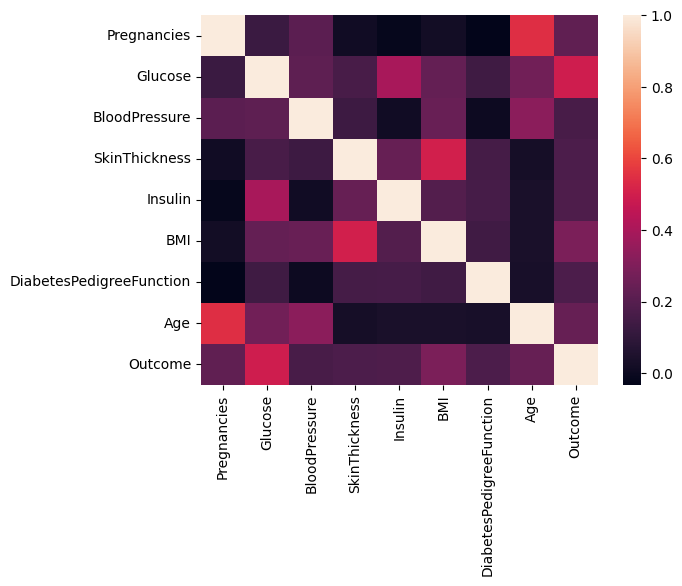

In [ ]:
data.info()

print(data.corr())
sns.heatmap(data.corr())

Explained variation per principal component: [0.87952666 0.07895245]


<Figure size 640x480 with 0 Axes>

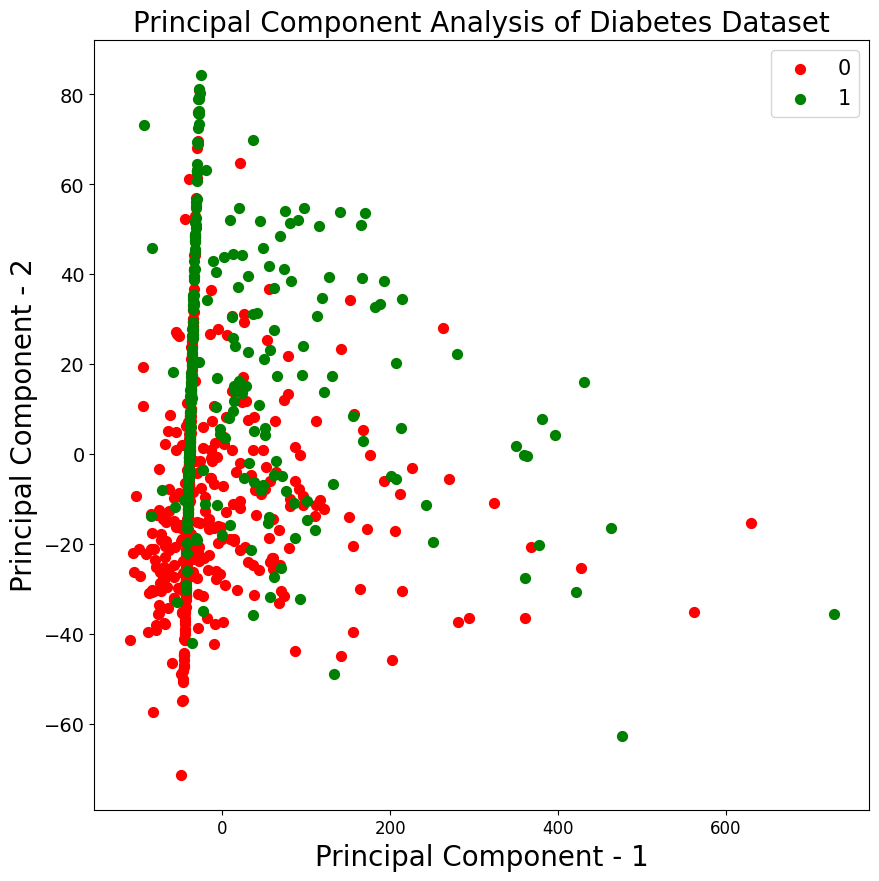

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(data)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

principal_df.tail()

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)
targets = [0, 1] # 0 means no diabetes, 1 means has diabetes
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['Outcome'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PC1']
               , principal_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})




In [ ]:
print(len(data))

X = data.drop(columns='Outcome')
Y = data['Outcome']

Xmatrix = X.to_numpy()
Ymatrix = Y.to_numpy()

print(Xmatrix)
print(Ymatrix)

x_train, x_test, y_train, y_test = train_test_split(Xmatrix, Ymatrix, test_size = 0.2, random_state = 2)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

768
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

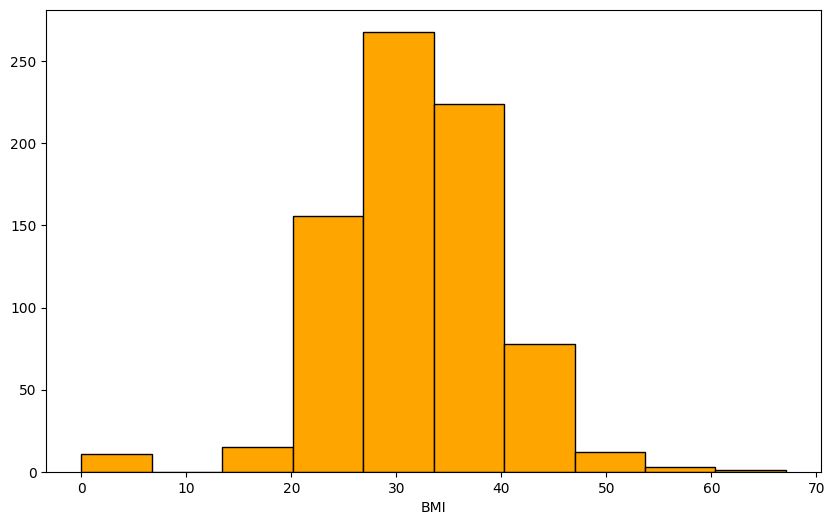

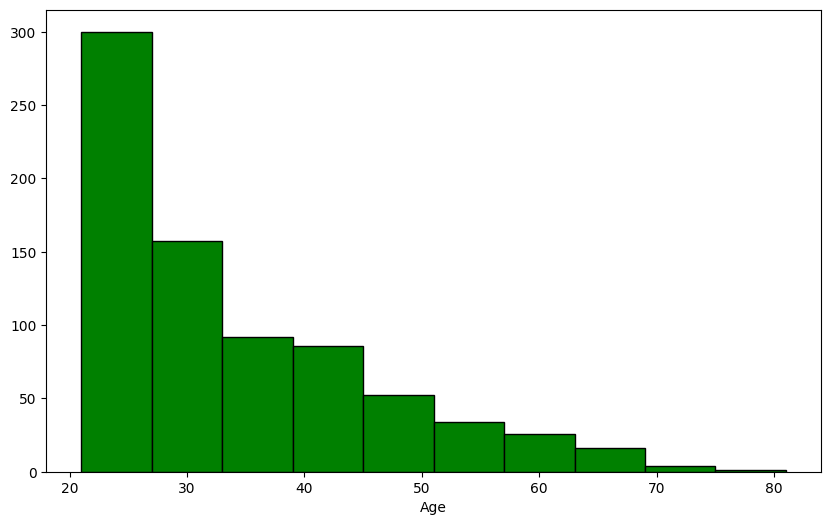

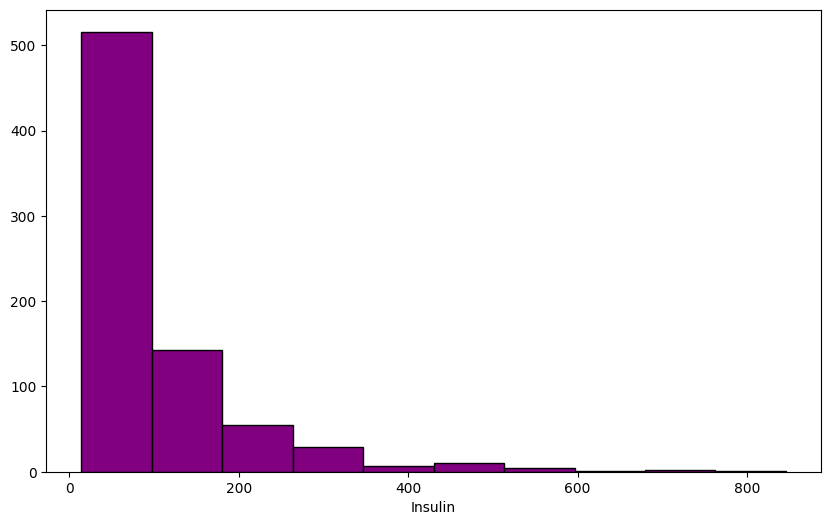

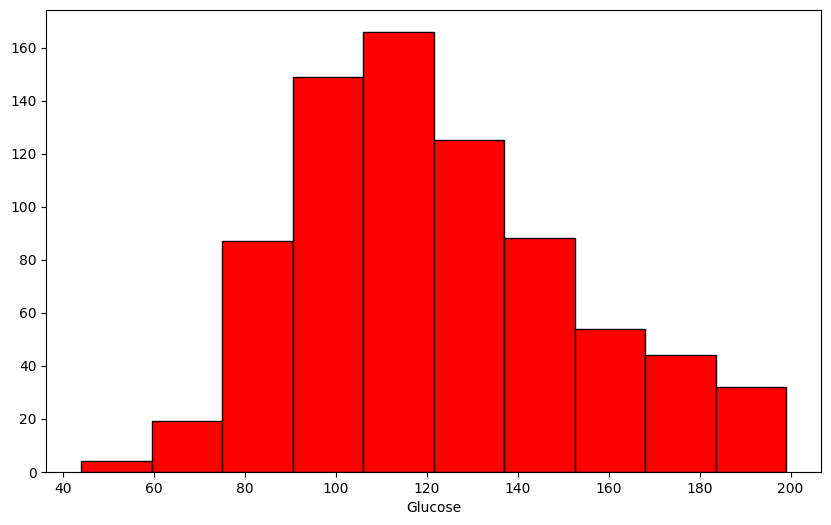

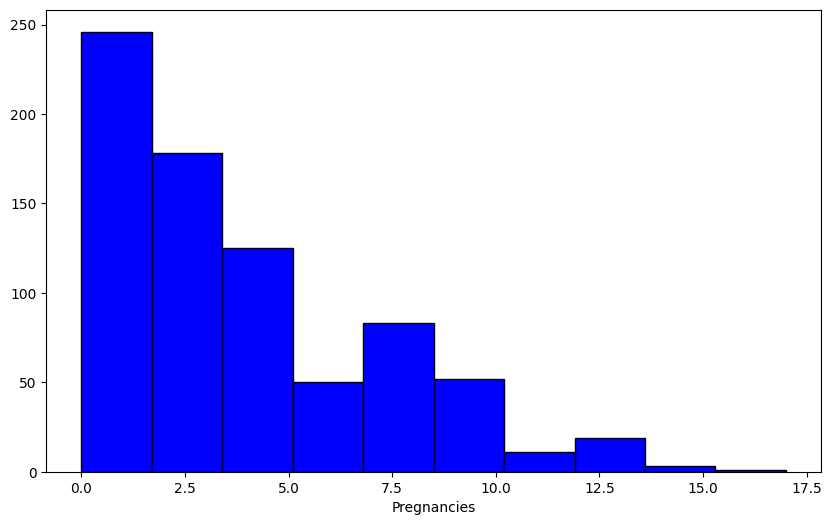

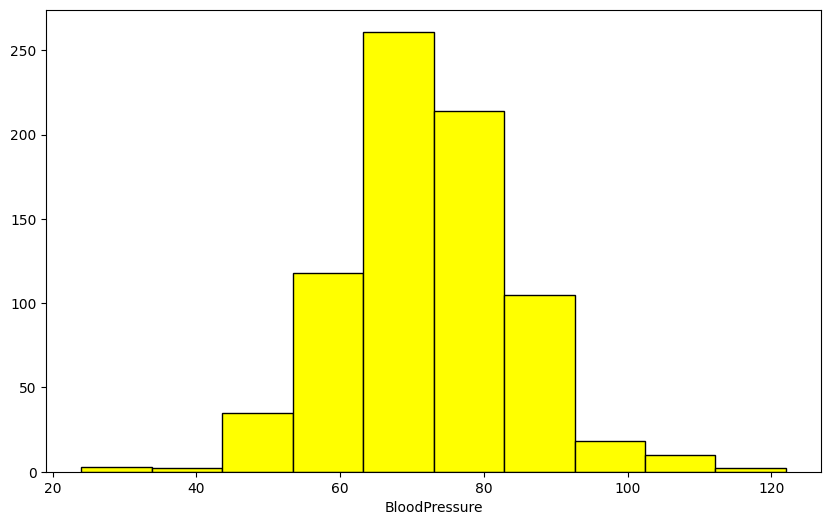

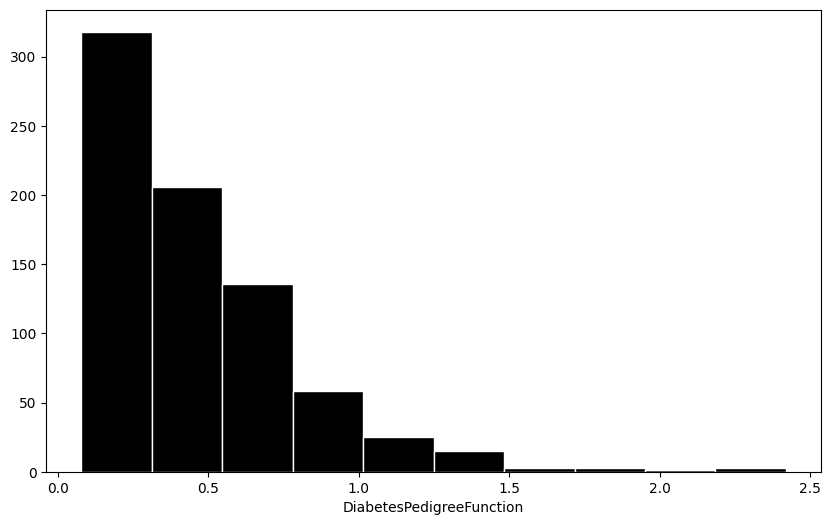

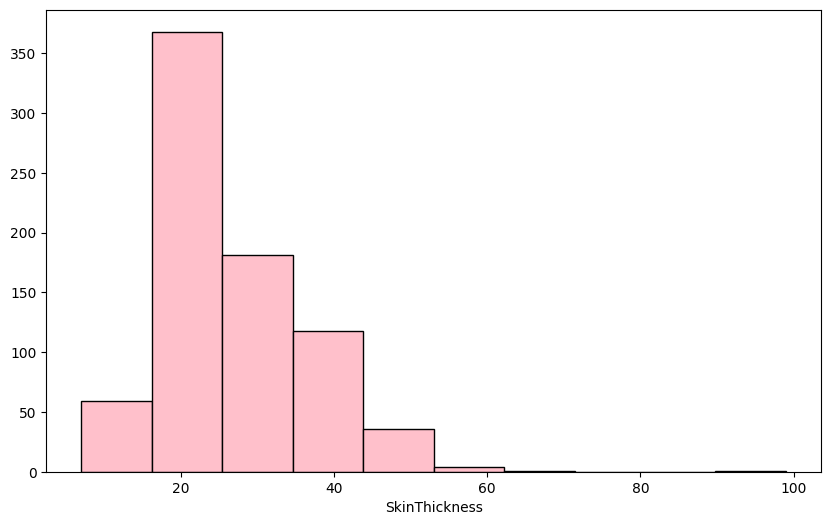

In [ ]:
#data visualization
print(data.describe())

plt.figure(figsize=(10,6))
plt.hist(data['BMI'], color='orange', edgecolor = 'black')
plt.xlabel('BMI')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['Age'], color='green', edgecolor = 'black')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['Insulin'], color='purple', edgecolor = 'black')
plt.xlabel('Insulin')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['Glucose'], color='red', edgecolor = 'black')
plt.xlabel('Glucose')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['Pregnancies'], color='blue', edgecolor = 'black')
plt.xlabel('Pregnancies')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['BloodPressure'], color='yellow', edgecolor = 'black')
plt.xlabel('BloodPressure')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['DiabetesPedigreeFunction'], color='black', edgecolor = 'white')
plt.xlabel('DiabetesPedigreeFunction')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(data['SkinThickness'], color='pink', edgecolor = 'black')
plt.xlabel('SkinThickness')
plt.show()



<Axes: xlabel='BloodPressure'>

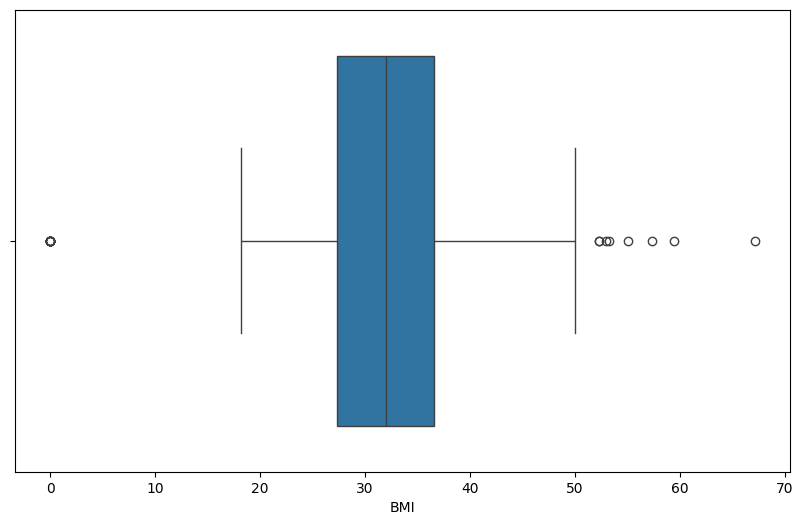

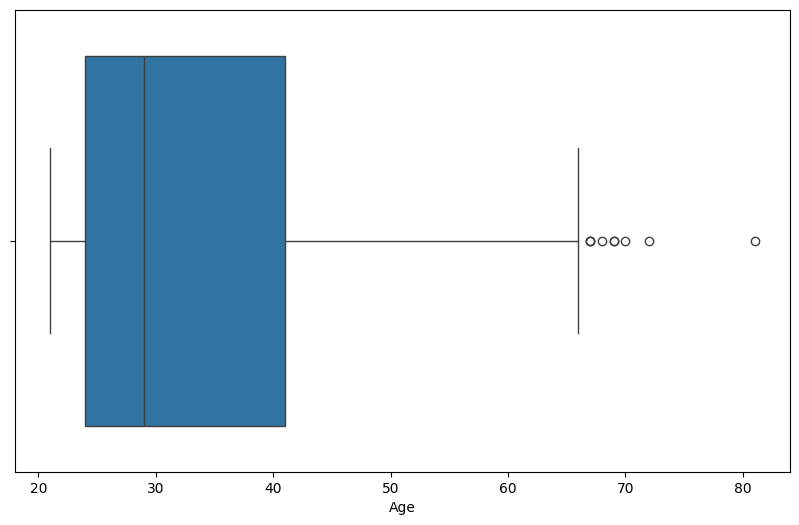

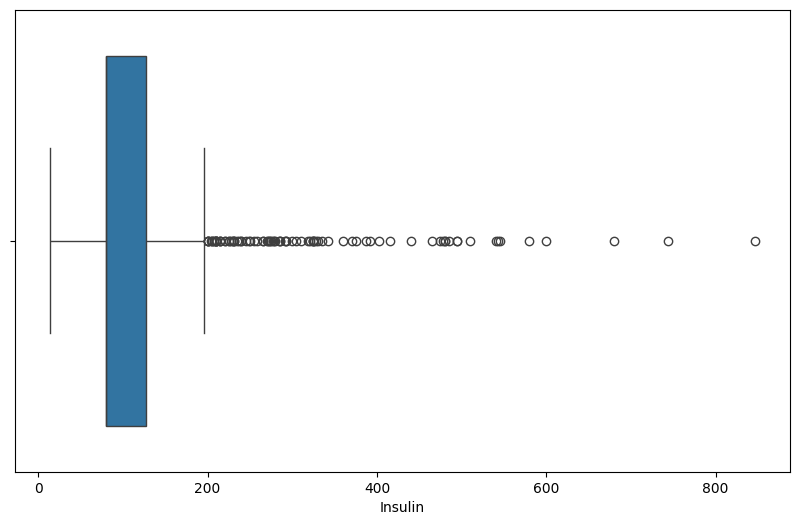

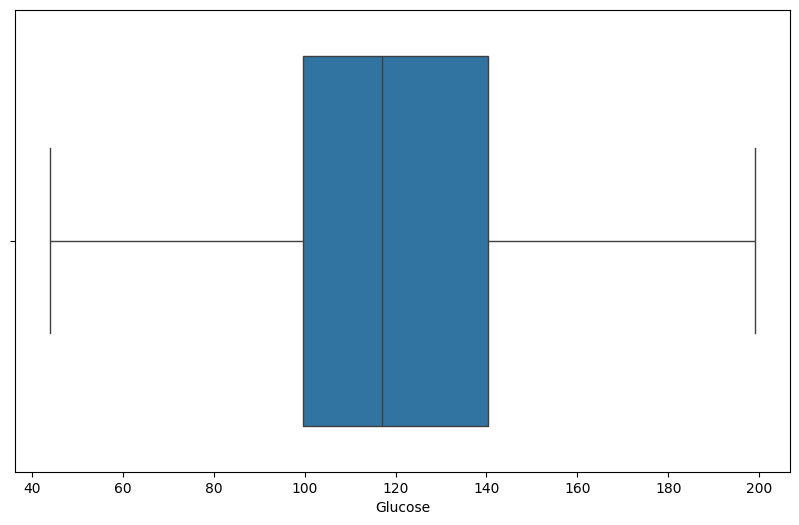

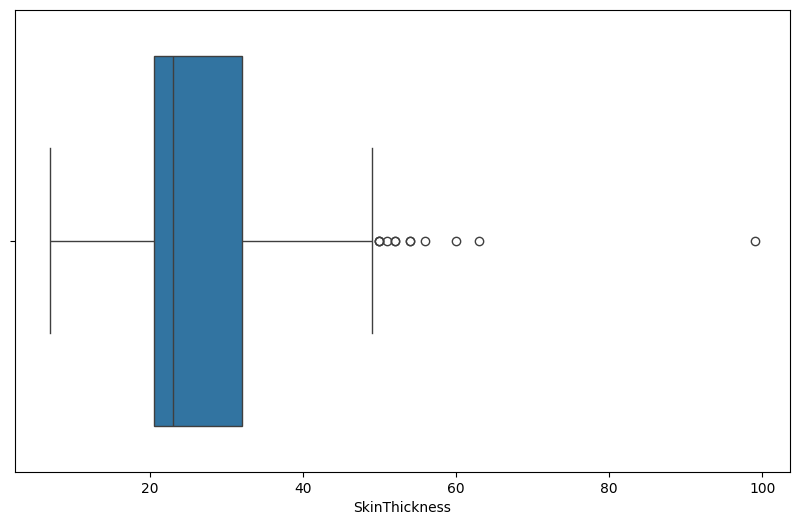

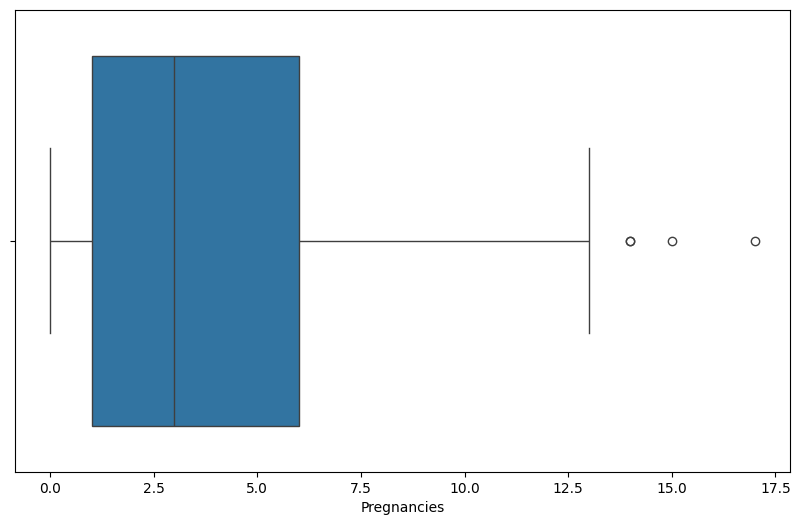

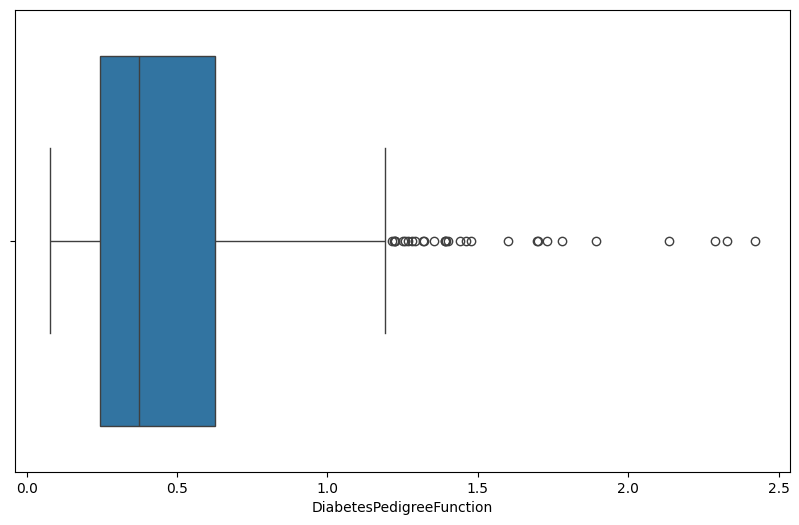

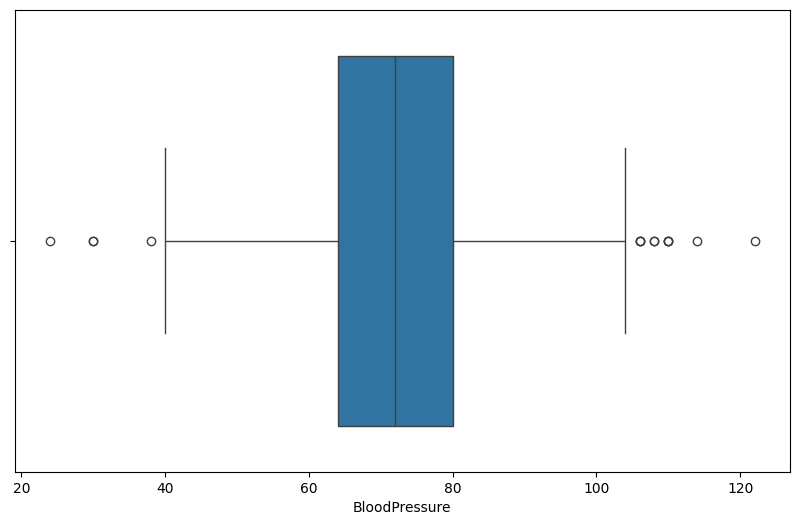

In [ ]:
#Boxplots

plt.figure(figsize=(10,6))
sns.boxplot(x=data['BMI'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['Age'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['Insulin'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['Glucose'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['SkinThickness'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['Pregnancies'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['DiabetesPedigreeFunction'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['BloodPressure'])

In [ ]:
#Baseline model development

#logisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


instance = LogisticRegression()
instance.fit(x_train, y_train)

pred = instance.predict(x_test)
print("Model metrics of logistic regression")
print("Accuracy score:", accuracy_score(y_test, pred))
print("f1_score:", f1_score(y_test, pred))
print("recall_score", recall_score(y_test, pred))
print("precision_score", precision_score(y_test, pred))

print(classification_report(y_test, pred))

#RidgeClassifier

from sklearn.linear_model import RidgeClassifier

instance2 = RidgeClassifier()
instance2.fit(x_train, y_train)

pred2 = instance2.predict(x_test)
print("Model metrics of ridgeclassifier")
print("Accuracy score:", accuracy_score(y_test, pred2))
print("f1_score:", f1_score(y_test, pred2))
print("recall_score", recall_score(y_test, pred2))
print("precision_score", precision_score(y_test, pred2))
print(classification_report(y_test, pred2))

#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

instance3 = RandomForestClassifier()
instance3.fit(x_train, y_train)

pred3 = instance3.predict(x_test)
print("Model metrics of randomforestclassifier")
print("Accuracy score:", accuracy_score(y_test, pred3))
print("f1_score:", f1_score(y_test, pred3))
print("recall_score", recall_score(y_test, pred3))
print("precision_score", precision_score(y_test, pred3))
print(classification_report(y_test, pred3))
#DecisionTrees

from sklearn.tree import DecisionTreeClassifier

instance4 = DecisionTreeClassifier()
instance4.fit(x_train,y_train)

pred4 = instance4.predict(x_test)
print("Model metrics of decisiontreeclassifier")
print("Accuracy score:", accuracy_score(y_test, pred4))
print("f1_score:", f1_score(y_test, pred4))
print("recall_score", recall_score(y_test, pred4))
print("precision_score", precision_score(y_test, pred4))
print(classification_report(y_test, pred4))
#Support Vector Machines

from sklearn.svm import SVC

instance5 = SVC()
instance5.fit(x_train, y_train)

pred5 = instance5.predict(x_test)
print("Model metrics of SVC")
print("Accuracy score:", accuracy_score(y_test, pred5))
print("f1_score:", f1_score(y_test, pred5))
print("recall_score", recall_score(y_test, pred5))
print("precision_score", precision_score(y_test, pred5))
print(classification_report(y_test, pred5))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model metrics of logistic regression
Accuracy score: 0.7337662337662337
f1_score: 0.5060240963855421
recall_score 0.4666666666666667
precision_score 0.5526315789473685
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       109
           1       0.55      0.47      0.51        45

    accuracy                           0.73       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.72      0.73      0.73       154

Model metrics of ridgeclassifier
Accuracy score: 0.7532467532467533
f1_score: 0.5365853658536586
recall_score 0.4888888888888889
precision_score 0.5945945945945946
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.59      0.49      0.54        45

    accuracy                           0.75       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.74      0.75      0.75       154

Model metrics 

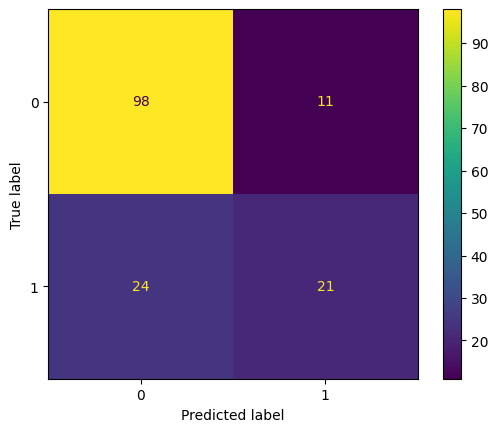

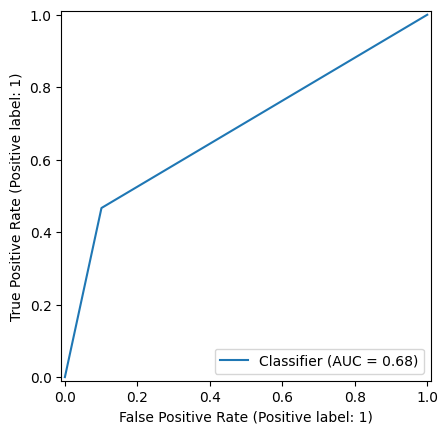

0.682874617737003


In [ ]:
#Using SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

confmatrix = confusion_matrix(y_test, pred5)
disp = ConfusionMatrixDisplay(confmatrix)
disp.plot()

fpr, tpr, thresholds = roc_curve(y_test, pred5)
disp2 = RocCurveDisplay.from_predictions(y_test, pred5)


plt.show()

print(auc(fpr, tpr))


Accuracy score: 0.7727272727272727
Accuracy score: 0.7727272727272727
Accuracy score: 0.7727272727272727
Accuracy score: 0.7727272727272727
Accuracy score: 0.7597402597402597
Accuracy score: 0.7662337662337663
Accuracy score: 0.7662337662337663
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.7597402597402597
Accuracy score: 0.7597402597402597
Accuracy score: 0.7662337662337663
Accuracy score: 0.7662337662337663
Accuracy score: 0.7662337662337663
Accuracy score: 0.7662337662337663
Accuracy score: 0.7597402597402597
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.7597402597402597
Accuracy score: 0.7597402597402597
Accuracy score: 0.7597402597402597
Accuracy score: 0.7597402597402597
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.7532467532467533
Accuracy score: 0.75

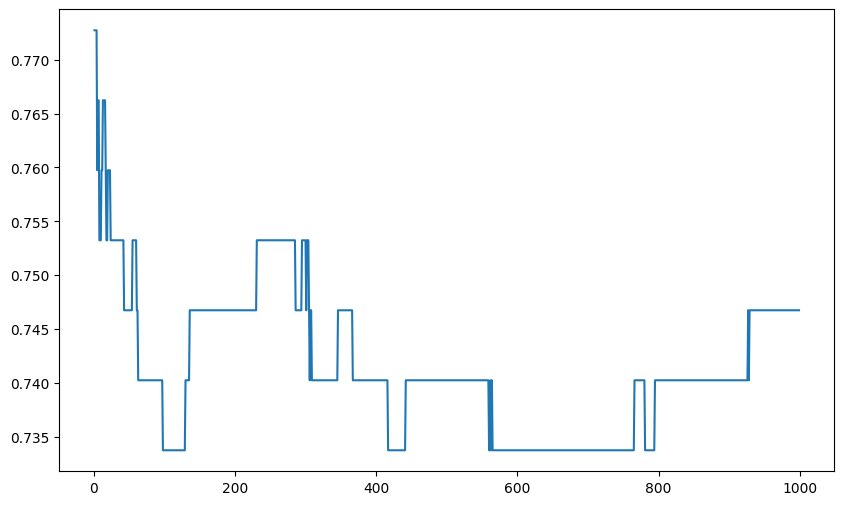

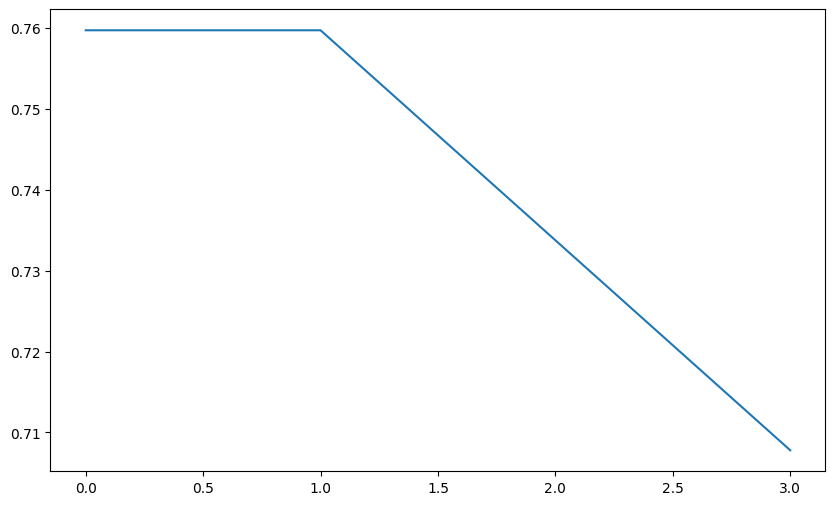

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

p = []

for i in range(1,1000):
  instance5 = SVC(C = i, random_state = 1)
  instance5.fit(x_train, y_train)

  pred5 = instance5.predict(x_test)
  p.append(accuracy_score(y_test, pred5))
  print(f"Accuracy score: {accuracy_score(y_test, pred5)}")

plt.figure(figsize=(10,6))
plt.plot(range(1, 1000), p)

print()

g = [0.0001, 0.001, 0.01, 0.1]
a = []
for j in range(len(g)):
  instance5 = SVC(gamma = g[j])
  instance5.fit(x_train, y_train)

  pred5 = instance5.predict(x_test)
  print(f"Accuracy score: {accuracy_score(y_test, pred5)}")
  a.append(accuracy_score(y_test, pred5))


plt.figure(figsize=(10,6))
plt.plot(range(len(g)), a)


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              'cache_size': [1, 100, 200, 300, 400]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


# fitting the model for grid search
grid.fit(x_train, y_train)


# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)




Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END C=0.1, cache_size=1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END C=0.1, cache_size=1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, cache_size=1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 4/5] END C=0.1, cache_size=1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 5/5] END C=0.1, cache_size=1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 1/5] END C=0.1, cache_size=1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END C=0.1, cache_size=1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, cache_size=1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 4/5] END C=0.1, cache_size=1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 5/5] END C=0.1, cache_size=1, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 1/5] END C=0.1, cache_size=1, gamma=0.01, kernel=rbf;

In [ ]:
grid_predictions = grid.predict(x_test)

svctuned = SVC(C = 100, gamma = 0.0000001, kernel = 'rbf')
svctuned.fit(x_train, y_train)

svctunedPred = svctuned.predict(x_test)

print(f"Accuracy score: {accuracy_score(y_test, svctunedPred)}")
print(f"f1_score score: {f1_score(y_test, svctunedPred)}")
print(f"Recall score: {recall_score(y_test, svctunedPred)}")
print(f"Precision score: {precision_score(y_test, svctunedPred)}")

print(classification_report(y_test, svctunedPred))

Accuracy score: 0.7987012987012987
f1_score score: 0.6075949367088608
Recall score: 0.5333333333333333
Precision score: 0.7058823529411765
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.71      0.53      0.61        45

    accuracy                           0.80       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.79      0.80      0.79       154



In [ ]:
!pip install coremltools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
import coremltools as ct
coreml_model = ct.converters.sklearn.convert(svctuned,
                                             input_features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies'],
                                             )
coreml_model.save("DiabetesPredictionTunedSVCModel.mlmodel")
from google.colab import files

files.download("DiabetesPredictionTunedSVCModel.mlmodel")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>